# Preprocessing

In [221]:
!pip install pyclustering
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

# dataset import
data_1 = pd.read_csv('population.csv', na_values=[' ?'])
data2_1 = pd.read_csv('more_than_50k.csv', na_values=[' ?'])

**Replacing missing data with NaN**: Specifying na_values in read_csv adds '?' to the list of values interpreted as NaN.

In [222]:
# details about the data
print(data_1)
data_1.info()
data_1.describe()

        AAGE                          ACLSWKR  ADTIND  ADTOCC  \
0         73                  Not in universe       0       0   
1         58   Self-employed-not incorporated       4      34   
2         18                  Not in universe       0       0   
3          9                  Not in universe       0       0   
4         10                  Not in universe       0       0   
...      ...                              ...     ...     ...   
199518    87                  Not in universe       0       0   
199519    65       Self-employed-incorporated      37       2   
199520    47                  Not in universe       0       0   
199521    16                  Not in universe       0       0   
199522    32                          Private      42      30   

                               AHGA  AHRSPAY            AHSCOL  \
0              High school graduate        0   Not in universe   
1        Some college but no degree        0   Not in universe   
2                    

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


In [223]:
data_1.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94


**Assessment of missing data**

In [224]:
# number of rows
print(data_1.shape[0])

# 40% number of rows
print(math.ceil(data_1.shape[0]*0.4))

# number of nan values in each column
print(data_1.isna().sum())

199523
79810
AAGE            0
ACLSWKR         0
ADTIND          0
ADTOCC          0
AHGA            0
AHRSPAY         0
AHSCOL          0
AMARITL         0
AMJIND          0
AMJOCC          0
ARACE           0
AREORGN         0
ASEX            0
AUNMEM          0
AUNTYPE         0
AWKSTAT         0
CAPGAIN         0
CAPLOSS         0
DIVVAL          0
FILESTAT        0
GRINREG         0
GRINST        708
HHDFMX          0
HHDREL          0
MIGMTR1     99696
MIGMTR3     99696
MIGMTR4     99696
MIGSAME         0
MIGSUN      99696
NOEMP           0
PARENT          0
PEFNTVTY     6713
PEMNTVTY     6119
PENATVTY     3393
PRCITSHP        0
SEOTR           0
VETQVA          0
VETYN           0
WKSWORK         0
YEAR            0
dtype: int64


The columns MIGMTR1, MIGMTR3, MIGMTR4, MIGSUN have more than 40% data missing.

In [225]:
# dropping MIGMTR1, MIGMTR3, MIGMTR4, MIGSUN columns
data_1 = data_1.drop(['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN'], axis=1)

# Feature Analysis

**Histograms of values for each feature**

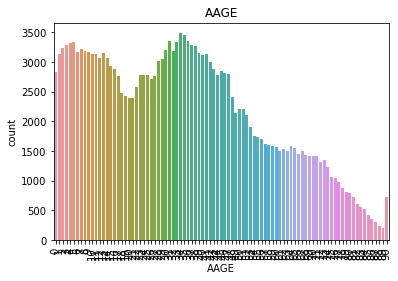

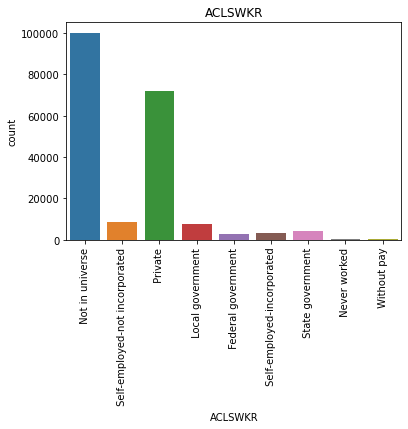

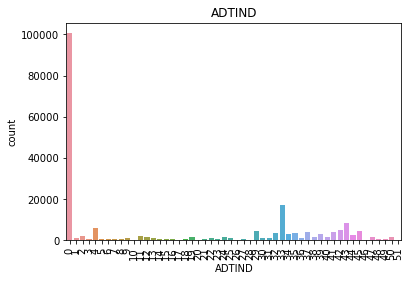

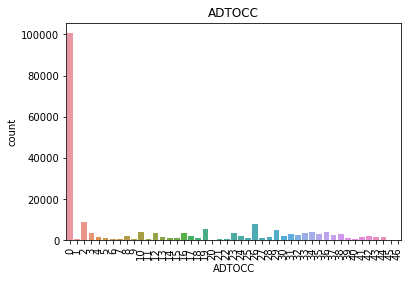

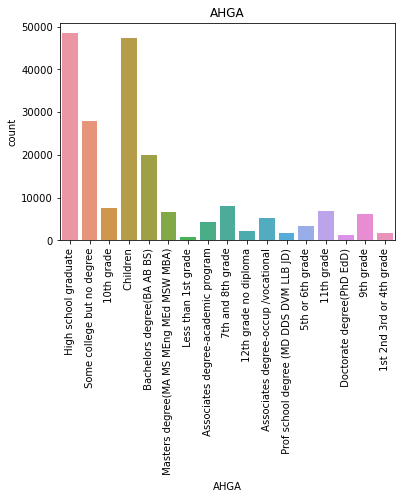

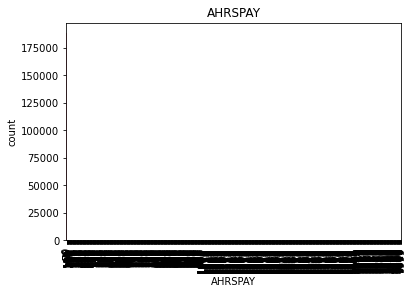

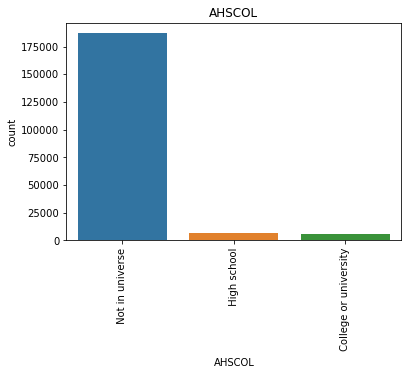

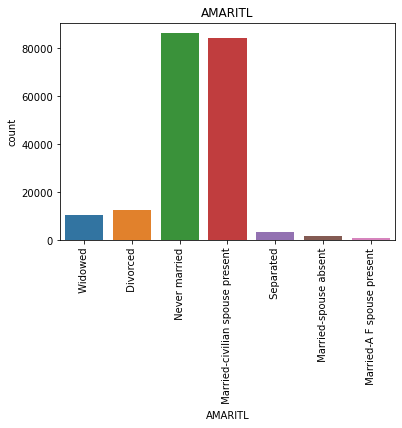

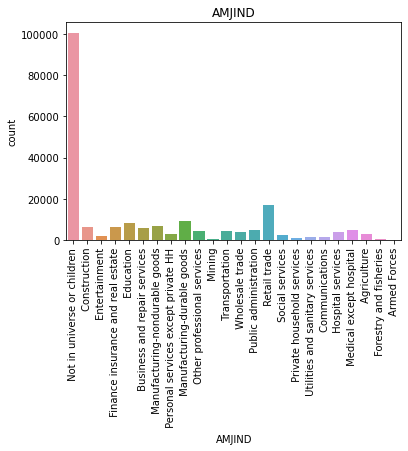

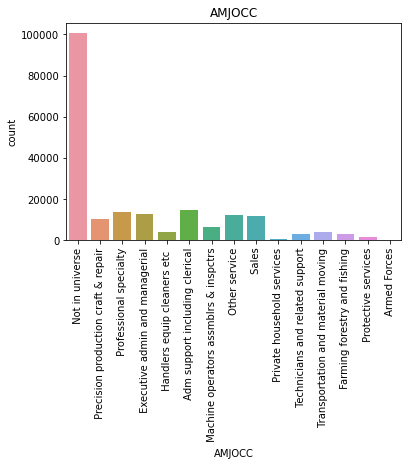

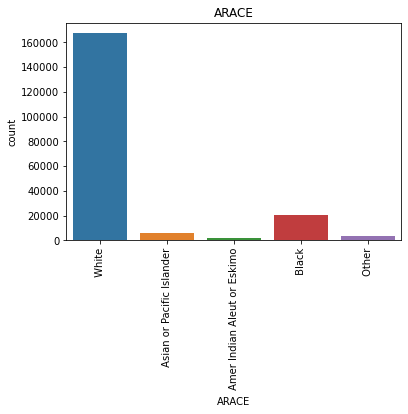

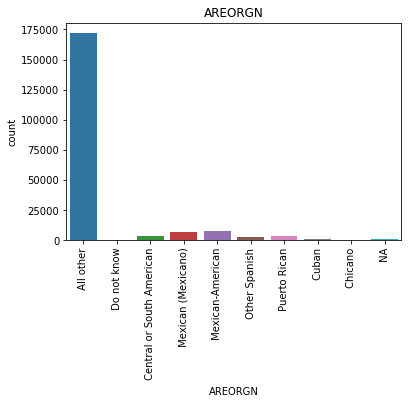

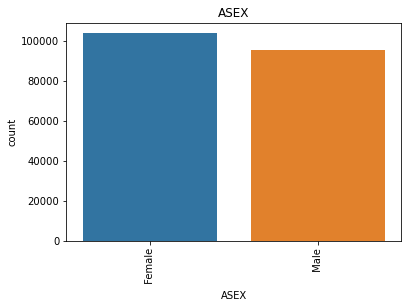

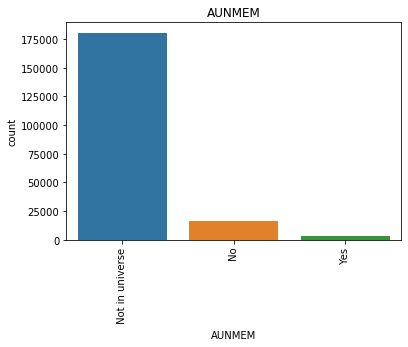

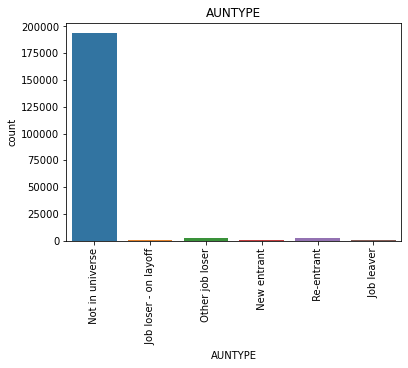

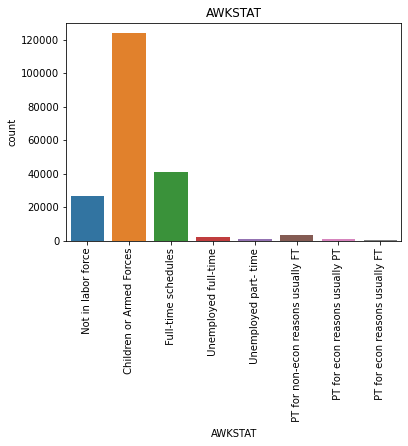

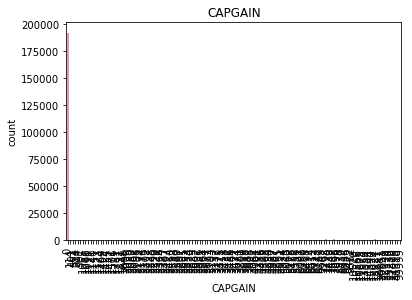

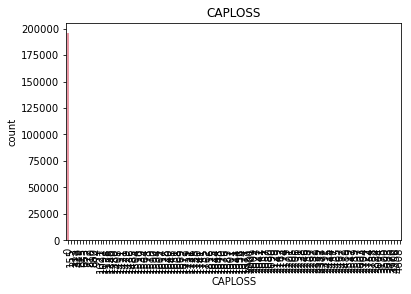

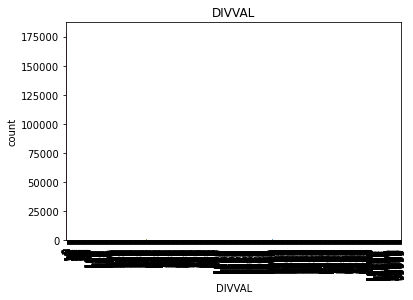

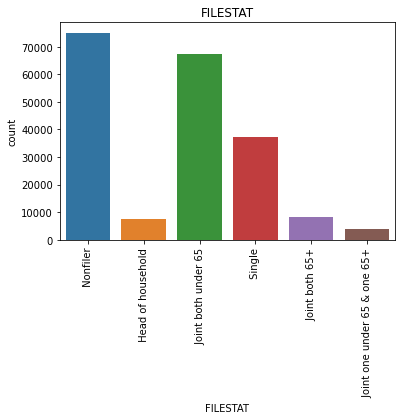

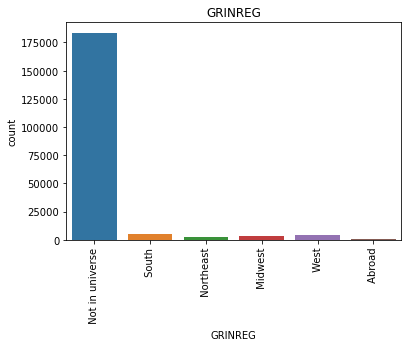

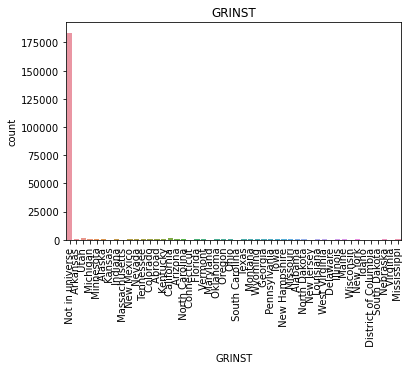

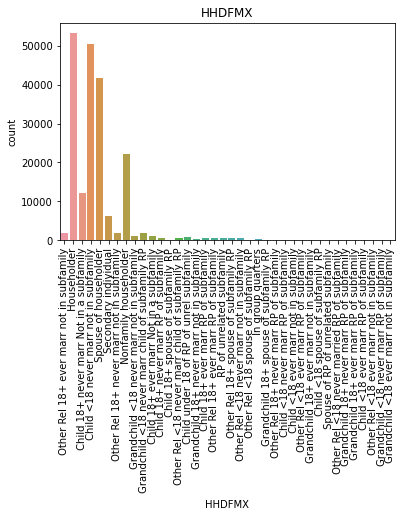

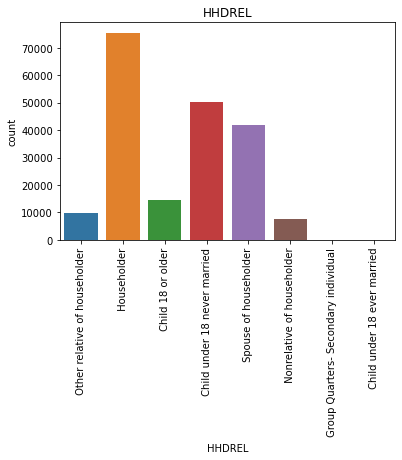

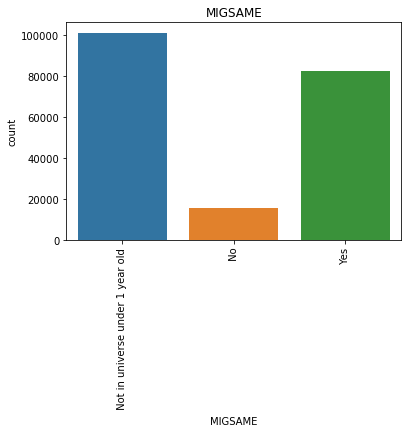

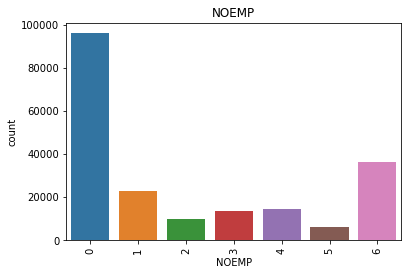

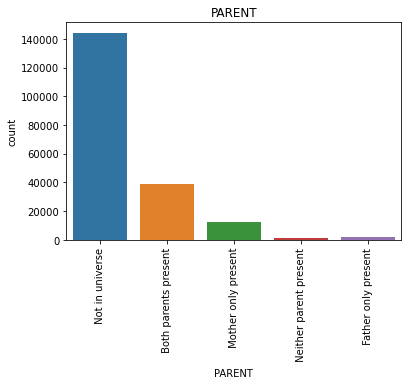

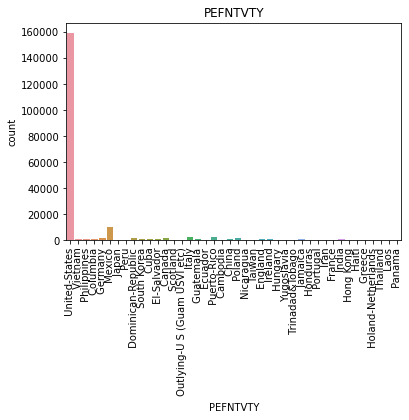

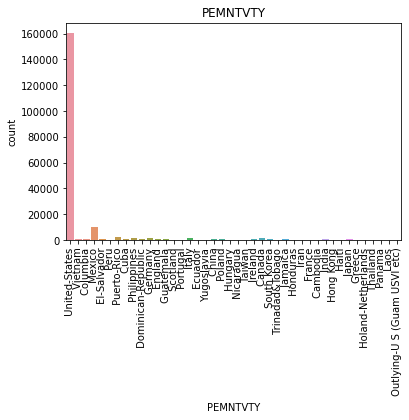

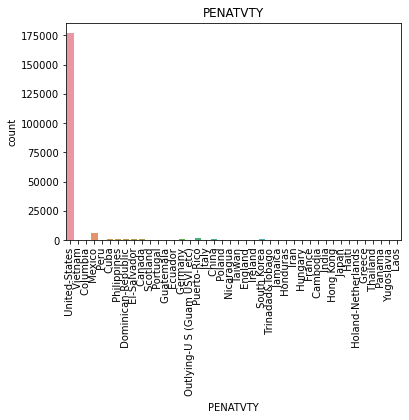

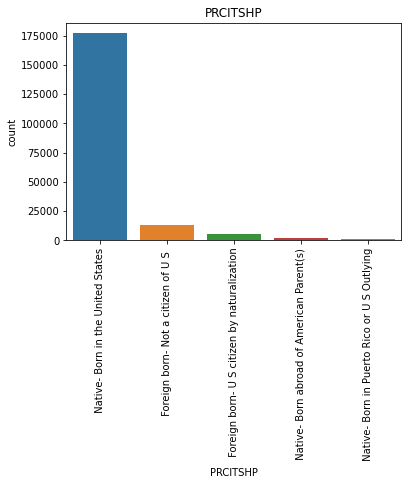

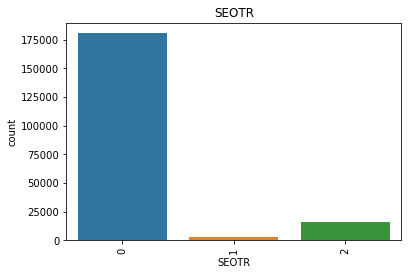

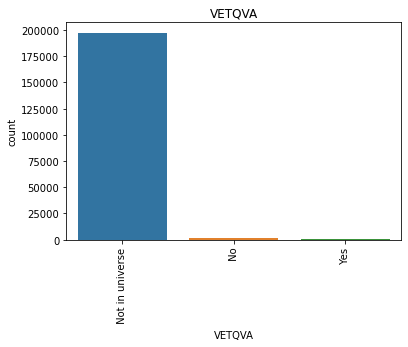

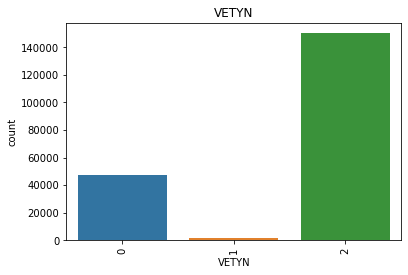

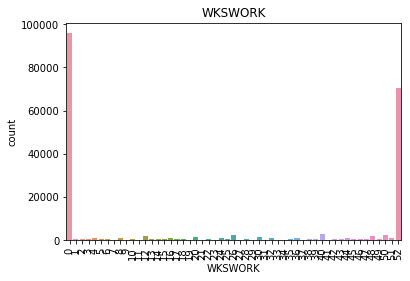

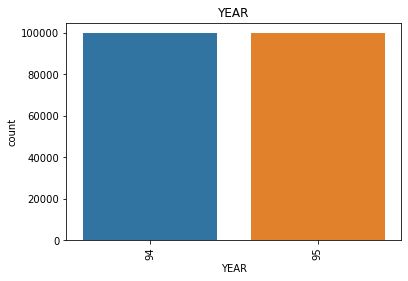

In [144]:
columns = data_1.columns
for column in columns:
    plt.title(column)
    sns.countplot(x = data_1[column])
    plt.xticks(rotation=90)
    plt.show()

In [226]:
# 85% number of rows
print(math.ceil(data_1.shape[0]*0.85))

169595


From the histograms, we can see that many of the features have skewed values. The features AHRSPAY, AHSCOL, AREORGN, AUNMEM, AUNTYPE, CAPGAIN, CAPLOSS, DIVVAL, GRINREG, GRINST, PEFNTVTY, PEMNTVTY, PENATVTY, PRCITSHP, SEOTR, VETQVA have more than 85% of of the data in one column and very less data in the remaining columns. These features are dropped as they do not provide much information.

In [227]:
# dropping AHRSPAY, AHSCOL, AREORGN, AUNMEM, AUNTYPE, CAPGAIN, CAPLOSS, DIVVAL, GRINREG, GRINST, PEFNTVTY, PEMNTVTY, PENATVTY, PRCITSHP, SEOTR, VETQVA columns
data_1 = data_1.drop(['AHRSPAY', 'AHSCOL', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'GRINREG', 'GRINST', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA'], axis=1)

**Replacing missing values with mode value**

In [228]:
# number of nan values in each column
print(data_1.isna().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
ASEX        0
AWKSTAT     0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


In [229]:
mode_values = {}
columns = data_1.columns
for column in columns:
    mode_val = data_1[column].mode().iloc[0]
    mode_values[column] = mode_val  # saving mode values in dictionary
    data_1[column].fillna(value=mode_val, inplace=True) # replacing nan values

# number of nan values in each column
print(data_1.isna().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
ASEX        0
AWKSTAT     0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


**Bucketizing: Converting numerical data to categorical data**

In [149]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AMARITL   199523 non-null  object
 6   AMJIND    199523 non-null  object
 7   AMJOCC    199523 non-null  object
 8   ARACE     199523 non-null  object
 9   ASEX      199523 non-null  object
 10  AWKSTAT   199523 non-null  object
 11  FILESTAT  199523 non-null  object
 12  HHDFMX    199523 non-null  object
 13  HHDREL    199523 non-null  object
 14  MIGSAME   199523 non-null  object
 15  NOEMP     199523 non-null  int64 
 16  PARENT    199523 non-null  object
 17  VETYN     199523 non-null  int64 
 18  WKSWORK   199523 non-null  int64 
 19  YEAR      199523 non-null  int64 
dtypes: int64(7), object(13)
me

The features AAGE, ADTIND, ADTOCC, NOEMP, VETYN, WKSWORK, YEAR have numerical data.

In [150]:
data_1['AAGE'].value_counts()

34    3489
35    3450
36    3353
31    3351
33    3340
      ... 
85     423
86     348
87     301
88     241
89     195
Name: AAGE, Length: 91, dtype: int64

In [151]:
print(data_1['AAGE'].min(), data_1['AAGE'].max())

0 90


In [213]:
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
data_1['AAGE'] = pd.cut(data_1['AAGE'], bins=bins, labels=labels)

In [153]:
data_1['ADTIND'].value_counts()

0     100684
33     17070
43      8283
4       5984
42      4683
45      4482
29      4209
37      4022
41      3964
32      3596
35      3380
39      2937
34      2765
44      2549
2       2196
11      1764
50      1704
40      1651
47      1644
38      1629
24      1503
12      1350
19      1346
30      1181
31      1178
25      1084
9        993
22       952
36       945
13       899
1        827
48       652
27       626
49       610
3        563
21       559
6        554
5        553
8        550
16       539
23       525
18       483
15       452
7        422
14       295
46       187
17       157
28       143
26       127
51        36
20        32
10         4
Name: ADTIND, dtype: int64

In [154]:
print(data_1['ADTIND'].min(), data_1['ADTIND'].max())

0 51


In [214]:
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60']
bins = [0, 10, 20, 30, 40, 50, 60]
data_1['ADTIND'] = pd.cut(data_1['ADTIND'], bins=bins, labels=labels)

In [156]:
data_1['ADTOCC'].value_counts()

0     100684
2       8756
26      7887
19      5413
29      5105
36      4145
34      4025
10      3683
16      3445
23      3392
12      3340
33      3325
3       3195
35      3168
38      3003
31      2699
32      2398
37      2234
8       2151
42      1918
30      1897
24      1847
17      1771
28      1661
41      1592
44      1592
43      1382
4       1364
13      1271
18      1083
39      1017
14       932
5        855
15       815
27       780
25       767
9        738
7        731
11       637
40       617
1        544
21       533
6        441
22       411
45       172
20        71
46        36
Name: ADTOCC, dtype: int64

In [157]:
print(data_1['ADTOCC'].min(), data_1['ADTOCC'].max())

0 46


In [215]:
labels = ['0-10', '10-20', '20-30', '30-40', '40-50']
bins = [0, 10, 20, 30, 40, 50]
data_1['ADTOCC'] = pd.cut(data_1['ADTOCC'], bins=bins, labels=labels)

In [159]:
data_1['NOEMP'].value_counts()

0    95983
6    36511
1    23109
4    14379
3    13425
2    10081
5     6035
Name: NOEMP, dtype: int64

In [216]:
data_1['NOEMP'] = data_1['NOEMP'].astype(str)

In [161]:
data_1['VETYN'].value_counts()

2    150130
0     47409
1      1984
Name: VETYN, dtype: int64

In [217]:
data_1['VETYN'] = data_1['VETYN'].astype(str)

In [163]:
data_1['WKSWORK'].value_counts()

0     95983
52    70314
40     2790
50     2304
26     2268
48     1806
12     1780
30     1378
20     1330
8      1126
36     1108
16      945
32      883
44      845
51      819
24      767
4       757
46      708
35      704
10      694
45      669
6       646
39      602
42      573
28      568
49      509
13      496
1       464
2       458
25      457
3       417
38      380
43      374
22      370
15      353
17      331
5       309
47      278
18      272
14      257
9       239
34      230
7       152
21      135
37      123
41       88
33       81
11       78
27       76
23       67
29       63
31       51
19       48
Name: WKSWORK, dtype: int64

In [164]:
print(data_1['WKSWORK'].min(), data_1['WKSWORK'].max())

0 52


In [218]:
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60']
bins = [0, 10, 20, 30, 40, 50, 60]
data_1['WKSWORK'] = pd.cut(data_1['WKSWORK'], bins=bins, labels=labels)

In [166]:
data_1['YEAR'].value_counts()

94    99827
95    99696
Name: YEAR, dtype: int64

In [219]:
data_1['YEAR'] = data_1['YEAR'].astype(str)

**One hot encoding of features**

In [168]:
data_1 = pd.get_dummies(data_1)
data_1.head()

,AAGE_0-10,AAGE_10-20,AAGE_20-30,AAGE_30-40,AAGE_40-50,AAGE_50-60,AAGE_60-70,AAGE_70-80,AAGE_80-90,ACLSWKR_ Federal government,...,VETYN_1,VETYN_2,WKSWORK_0-10,WKSWORK_10-20,WKSWORK_20-30,WKSWORK_30-40,WKSWORK_40-50,WKSWORK_50-60,YEAR_94,YEAR_95
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Dimensionality Reduction**

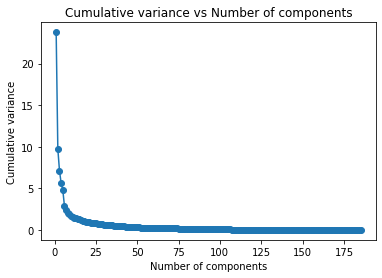


Cumulative variance: 100.00000000000003 %


In [32]:
from sklearn.decomposition import PCA

pca = PCA(random_state=0)
pca_fit = pca.fit(data_1)

pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_ * 100, 'o-')
plt.title('Cumulative variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance')
plt.show()

print('\nCumulative variance:', sum(pca.explained_variance_ratio_) * 100, '%')

Let us take cumulative variance greater than 80%. This can be obtained by selecting 35 components, which account for 84.59% of cumulative variance.

In [135]:
pca = PCA(35, random_state=0)
data = pca.fit_transform(data_1)
print('\nCumulative variance:', sum(pca.explained_variance_ratio_) * 100, '%')


Cumulative variance: 100.00000000000003 %


**K-Medians Clustering**

In [45]:
from pyclustering.cluster.kmedians import kmedians

data = pd.DataFrame(data)
within_clus_dist = []
for k in range(2, 25, 2):
    initial_medians = data.sample(n=k, random_state=0)
    kmedians_clus = kmedians(data, initial_medians)
    kmedians_clus.process()
    clusters = kmedians_clus.get_clusters()
    medians = kmedians_clus.get_medians()
    within_clus_dist.append(kmedians_clus.get_total_wce())

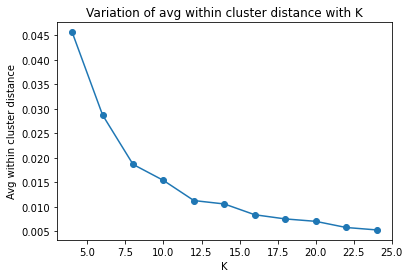

Avg within cluster distance:  [0.0456467006224156, 0.02875037839391602, 0.018685224760951344, 0.015405926023810277, 0.011299268217371561, 0.010605727509982765, 0.00840511208171546, 0.007555620643322393, 0.0070622163196939645, 0.005806285254530063, 0.005310288762548051]


In [95]:
k_vals = [x for x in range(4, 25, 2)]
dist = []
for i in range(1, len(within_clus_dist)):
    dist.append(within_clus_dist[i] / data2.shape[0])
plt.plot(k_vals, dist, marker='o')
plt.title('Variation of avg within cluster distance with K')
plt.xlabel('K')
plt.ylabel('Avg within cluster distance')
plt.show()
print('Avg within cluster distance: ', dist)

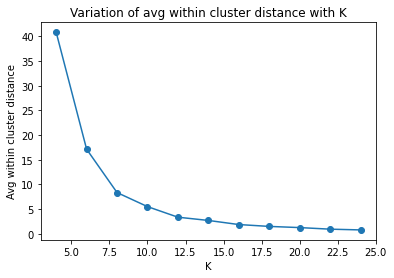

Avg within cluster distance:  [40.85379705706196, 17.154392441703227, 8.361638080525726, 5.51532151652408, 3.370948351515849, 2.712036034695593, 1.880643828283834, 1.5027289946163425, 1.2641367212252197, 0.9448409641462557, 0.7921180737467509]


In [96]:
k_vals = [x for x in range(4, 25, 2)]
dist = []
for i in range(1, len(within_clus_dist)):
    dist.append(within_clus_dist[i] / k_vals[i-1])
plt.plot(k_vals, dist, marker='o')
plt.title('Variation of avg within cluster distance with K')
plt.xlabel('K')
plt.ylabel('Avg within cluster distance')
plt.show()
print('Avg within cluster distance: ', dist)

The graph shows elbow at k = 20 which can be taken as the best value for k among the values checked.

In [98]:
data = pd.DataFrame(data)
initial_medians20 = data.sample(n=20, random_state=0)
kmedians_clus20 = kmedians(data, initial_medians20)
kmedians_clus20.process()
clusters20 = kmedians_clus20.get_clusters()
medians20 = kmedians_clus20.get_medians()

In [104]:
import pickle
filename = 'clusters_k20.pkl'
pickle.dump(clusters20, open(filename, 'wb'))
# loaded_clus = pickle.load(open(filename, 'rb'))

**Amount of data in each cluster for general population dataset**

In [102]:
cluster_sizes = []
for cluster in clusters20:
    cluster_sizes.append(len(cluster))

In [114]:
print(cluster_sizes)
print([x/data.shape[0] for x in cluster_sizes])

[67, 72, 76, 82, 90, 114, 116, 133, 134, 139, 147, 184, 196, 200, 203, 231, 237, 320, 328, 511]
[0.018715083798882683, 0.02011173184357542, 0.021229050279329607, 0.022905027932960894, 0.025139664804469275, 0.031843575418994415, 0.03240223463687151, 0.03715083798882682, 0.037430167597765365, 0.0388268156424581, 0.04106145251396648, 0.05139664804469274, 0.054748603351955305, 0.055865921787709494, 0.05670391061452514, 0.06452513966480447, 0.06620111731843575, 0.0893854748603352, 0.09162011173184358, 0.14273743016759777]


# More than 50k 

**Assessment of missing values**

In [232]:
# number of rows
print(data2_1.shape[0])

# 40% number of rows
print(math.ceil(data2_1.shape[0]*0.4))

# number of nan values in each column
print(data2_1.isna().sum())

3580
1432
AAGE           0
ACLSWKR        0
ADTIND         0
ADTOCC         0
AHGA           0
AHRSPAY        0
AHSCOL         0
AMARITL        0
AMJIND         0
AMJOCC         0
ARACE          0
AREORGN        0
ASEX           0
AUNMEM         0
AUNTYPE        0
AWKSTAT        0
CAPGAIN        0
CAPLOSS        0
DIVVAL         0
FILESTAT       0
GRINREG        0
GRINST        14
HHDFMX         0
HHDREL         0
MIGMTR1     1906
MIGMTR3     1906
MIGMTR4     1906
MIGSAME        0
MIGSUN      1906
NOEMP          0
PARENT         0
PEFNTVTY     162
PEMNTVTY     134
PENATVTY      93
PRCITSHP       0
SEOTR          0
VETQVA         0
VETYN          0
WKSWORK        0
YEAR           0
dtype: int64


The columns MIGMTR1, MIGMTR3, MIGMTR4, MIGSUN have more than 40% data missing.

In [233]:
# dropping MIGMTR1, MIGMTR3, MIGMTR4, MIGSUN columns
data2_1 = data2_1.drop(['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN'], axis=1)

**Histograms of values for each feature**

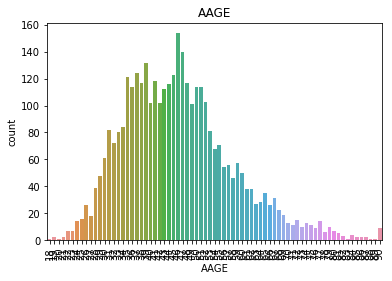

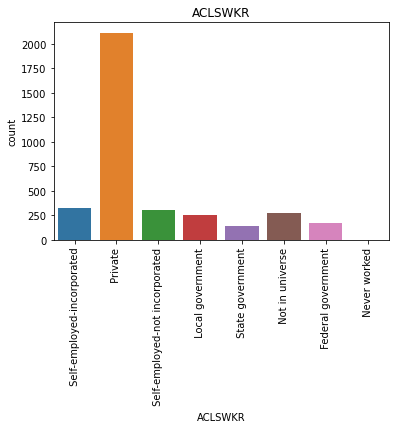

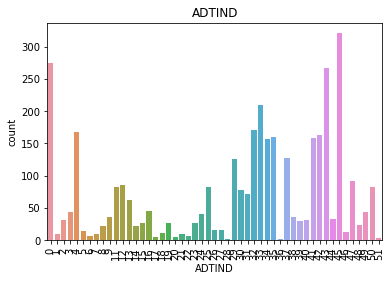

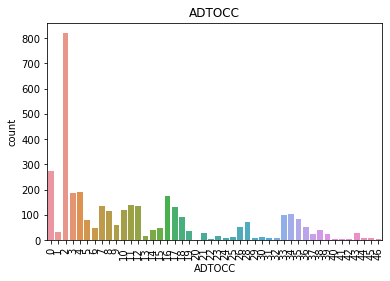

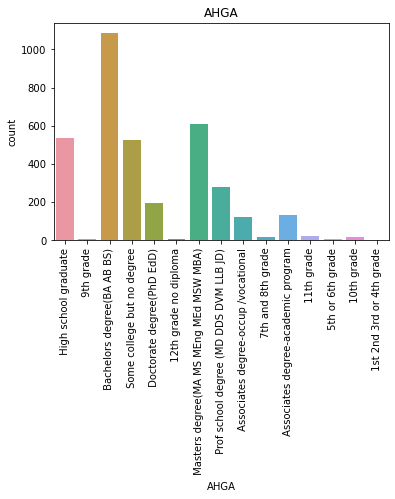

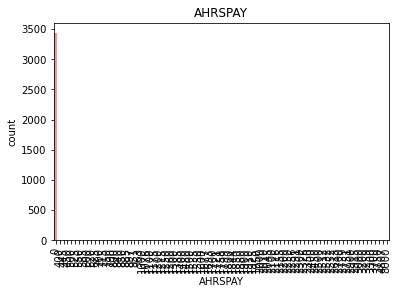

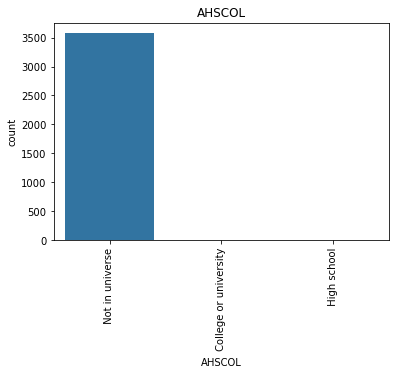

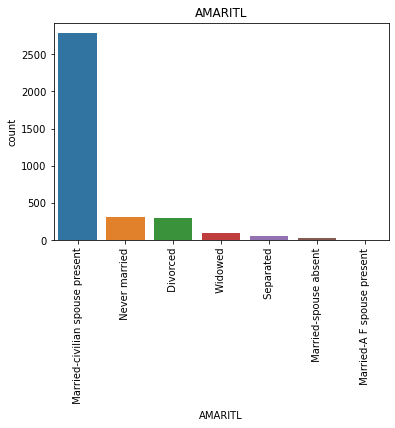

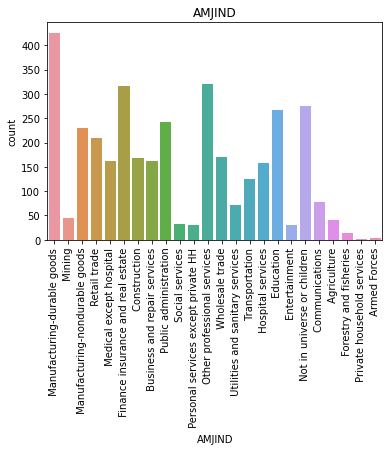

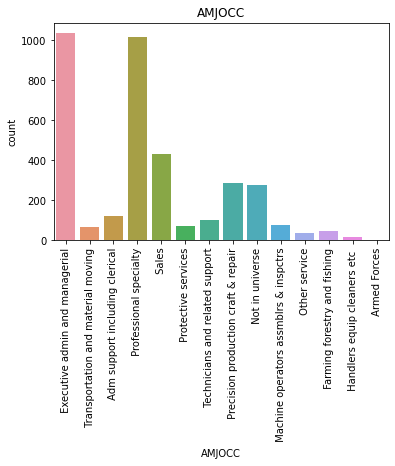

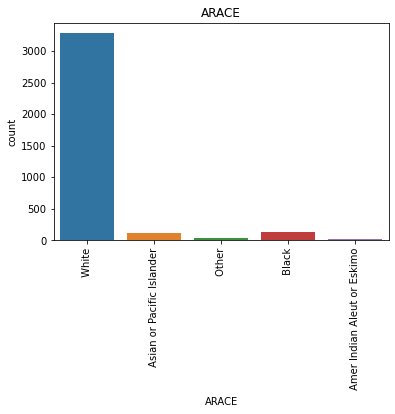

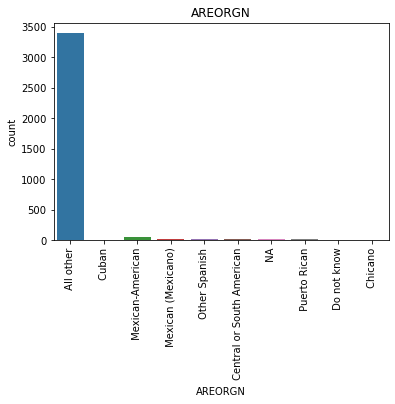

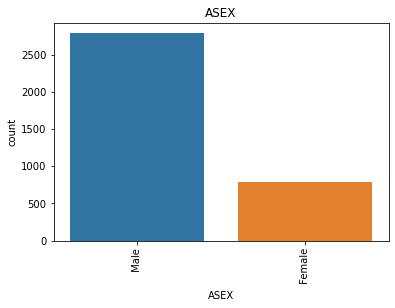

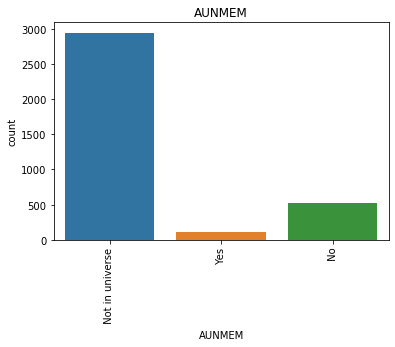

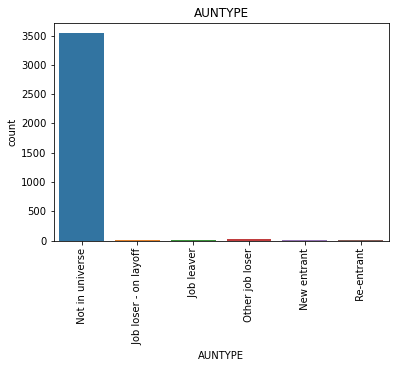

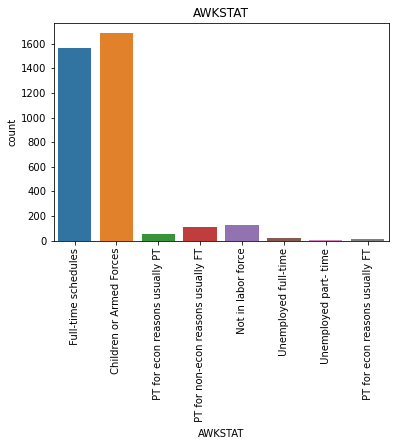

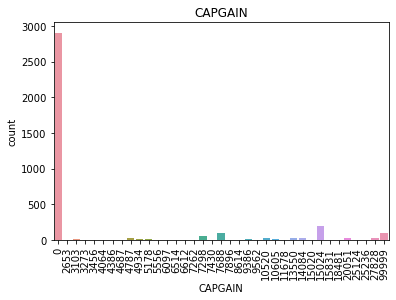

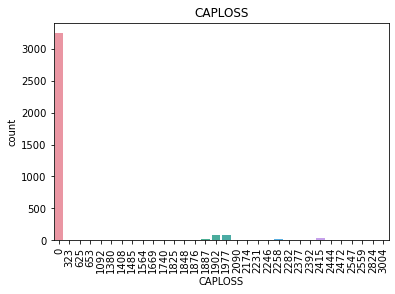

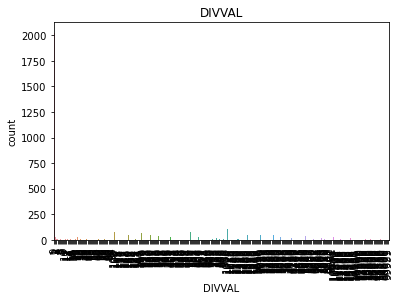

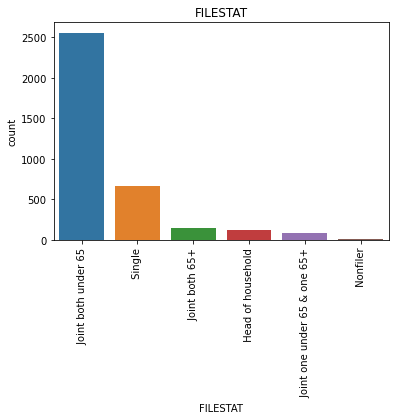

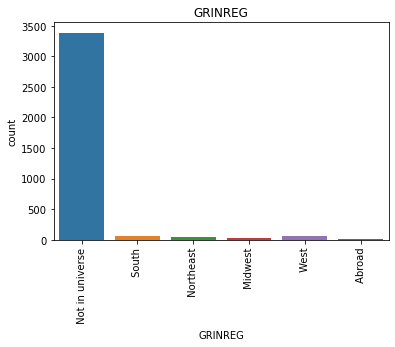

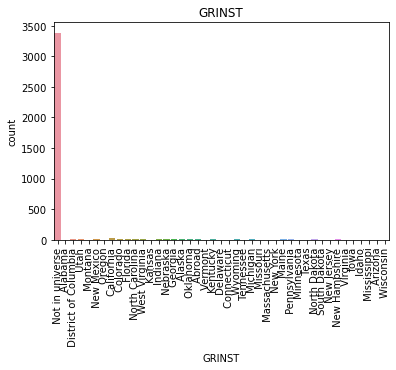

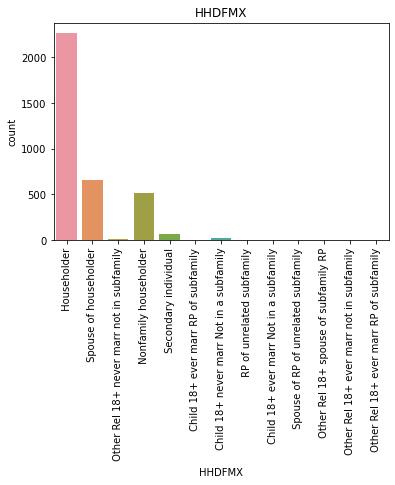

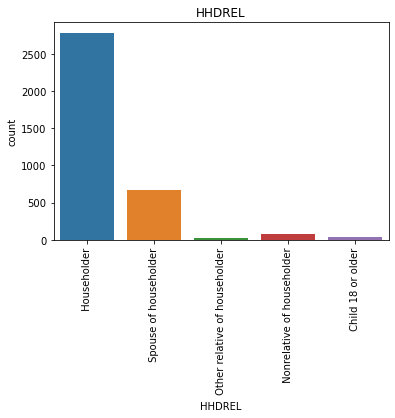

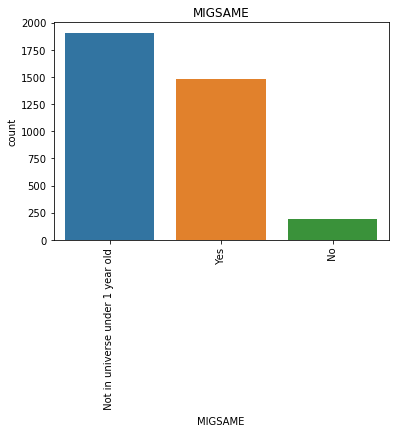

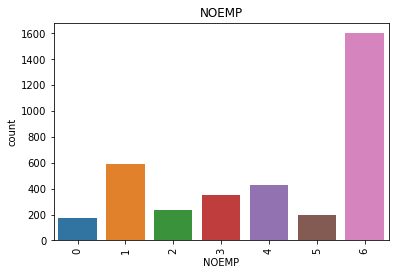

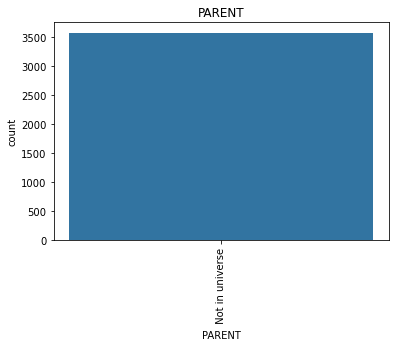

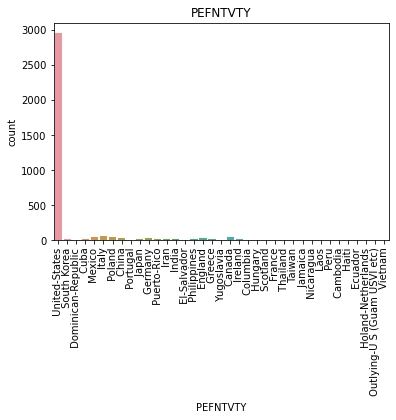

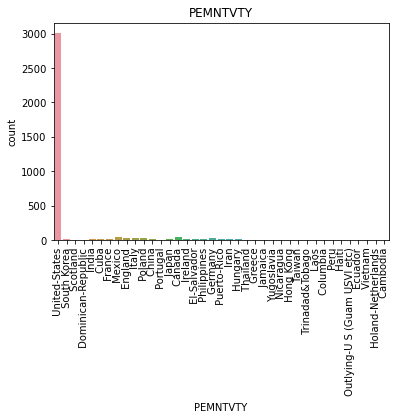

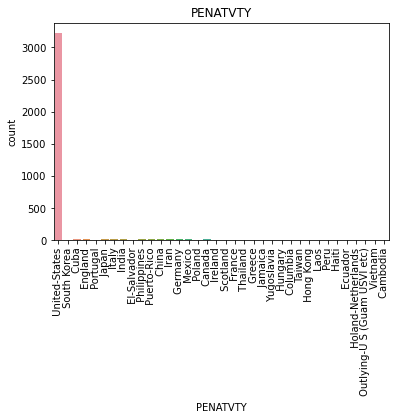

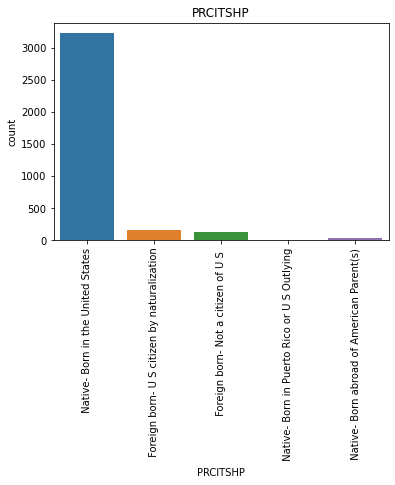

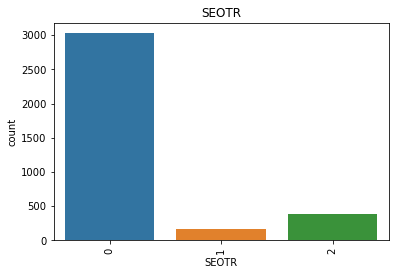

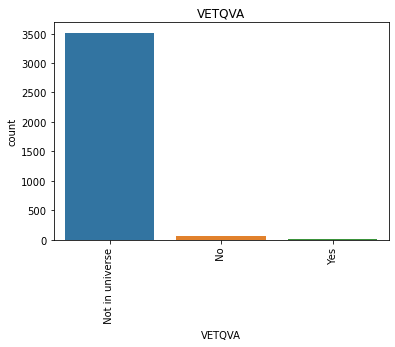

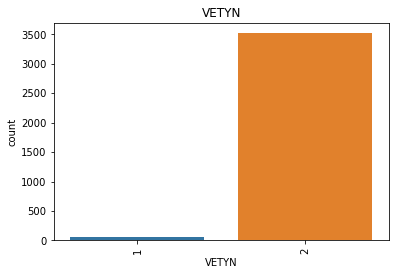

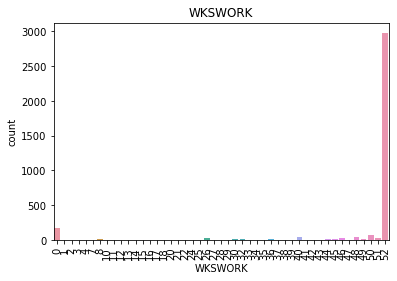

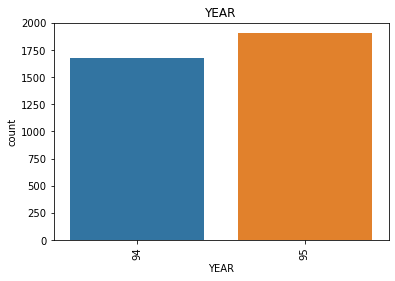

In [60]:
columns = data2_1.columns
for column in columns:
    plt.title(column)
    sns.countplot(x = data2_1[column])
    plt.xticks(rotation=90)
    plt.show()

In [170]:
# 85% number of rows
print(math.ceil(data2_1.shape[0]*0.85))

3043


Based on the analysis of histograms for the general poplutaion dataset, we drop the same fearures AHRSPAY, AHSCOL, AREORGN, AUNMEM, AUNTYPE, CAPGAIN, CAPLOSS, DIVVAL, GRINREG, GRINST, PEFNTVTY, PEMNTVTY, PENATVTY, PRCITSHP, SEOTR, VETQVA for the more than 50k dataset as the general population dataset has more data points and gives better information about which features are relevant to the data.

In [234]:
# dropping AHRSPAY, AHSCOL, AREORGN, AUNMEM, AUNTYPE, CAPGAIN, CAPLOSS, DIVVAL, GRINREG, GRINST, PEFNTVTY, PEMNTVTY, PENATVTY, PRCITSHP, SEOTR, VETQVA columns
data2_1 = data2_1.drop(['AHRSPAY', 'AHSCOL', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'GRINREG', 'GRINST', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA'], axis=1)

**Replacing missing values with mode value**

In [174]:
# number of nan values in each column
print(data2_1.isna().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
ASEX        0
AWKSTAT     0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


None of the features have missing data to be replaced by mode values.

**Bucketizing: Converting numerical data to categorical data**

In [175]:
data2_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AAGE      3580 non-null   int64 
 1   ACLSWKR   3580 non-null   object
 2   ADTIND    3580 non-null   int64 
 3   ADTOCC    3580 non-null   int64 
 4   AHGA      3580 non-null   object
 5   AMARITL   3580 non-null   object
 6   AMJIND    3580 non-null   object
 7   AMJOCC    3580 non-null   object
 8   ARACE     3580 non-null   object
 9   ASEX      3580 non-null   object
 10  AWKSTAT   3580 non-null   object
 11  FILESTAT  3580 non-null   object
 12  HHDFMX    3580 non-null   object
 13  HHDREL    3580 non-null   object
 14  MIGSAME   3580 non-null   object
 15  NOEMP     3580 non-null   int64 
 16  PARENT    3580 non-null   object
 17  VETYN     3580 non-null   int64 
 18  WKSWORK   3580 non-null   int64 
 19  YEAR      3580 non-null   int64 
dtypes: int64(7), object(13)
memory usage: 559.5+ KB


In [176]:
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
data2_1['AAGE'] = pd.cut(data2_1['AAGE'], bins=bins, labels=labels)

labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60']
bins = [0, 10, 20, 30, 40, 50, 60]
data2_1['ADTIND'] = pd.cut(data2_1['ADTIND'], bins=bins, labels=labels)

labels = ['0-10', '10-20', '20-30', '30-40', '40-50']
bins = [0, 10, 20, 30, 40, 50]
data2_1['ADTOCC'] = pd.cut(data2_1['ADTOCC'], bins=bins, labels=labels)

labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60']
bins = [0, 10, 20, 30, 40, 50, 60]
data2_1['WKSWORK'] = pd.cut(data2_1['WKSWORK'], bins=bins, labels=labels)

data2_1['NOEMP'] = data2_1['NOEMP'].astype(str)
data2_1['VETYN'] = data2_1['VETYN'].astype(str)
data2_1['YEAR'] = data2_1['YEAR'].astype(str)

**One hot encoding of features**

In [177]:
data2_1 = pd.get_dummies(data2_1)
data2_1.head()

,AAGE_0-10,AAGE_10-20,AAGE_20-30,AAGE_30-40,AAGE_40-50,AAGE_50-60,AAGE_60-70,AAGE_70-80,AAGE_80-90,ACLSWKR_ Federal government,...,VETYN_1,VETYN_2,WKSWORK_0-10,WKSWORK_10-20,WKSWORK_20-30,WKSWORK_30-40,WKSWORK_40-50,WKSWORK_50-60,YEAR_94,YEAR_95
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


**Dimensionality Reduction**

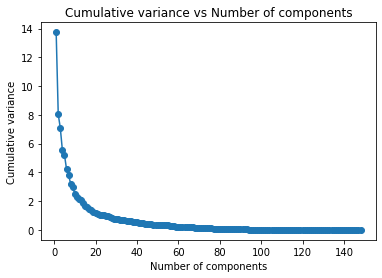


Cumulative variance: 99.99999999999997 %


In [67]:
from sklearn.decomposition import PCA

pca = PCA(random_state=0)
pca_fit = pca.fit(data2_1)

pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_ * 100, 'o-')
plt.title('Cumulative variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance')
plt.show()

print('\nCumulative variance:', sum(pca.explained_variance_ratio_) * 100, '%')

In [132]:
pca2 = PCA(35, random_state=0)
data = pca2.fit_transform(data2)
print('\nCumulative variance:', sum(pca2.explained_variance_ratio_) * 100, '%')


Cumulative variance: 86.31197705085889 %


**K-Medians Clustering**

In [86]:
from pyclustering.cluster.kmedians import kmedians

data2 = pd.DataFrame(data2)
within_clus_dist2 = []
for k in range(4, 25, 2):
    initial_medians2 = data2.sample(n=k, random_state=0)
    kmedians_clus2 = kmedians(data2, initial_medians2)
    kmedians_clus2.process()
    clusters2 = kmedians_clus2.get_clusters()
    medians2 = kmedians_clus2.get_medians()
    within_clus_dist2.append(kmedians_clus2.get_total_wce())

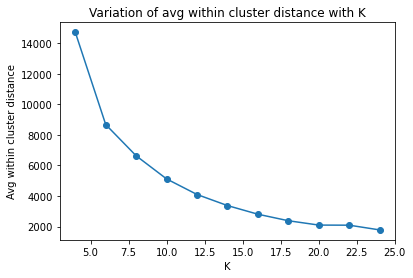

Avg within cluster distance:  [14721.0, 8676.5, 6632.75, 5119.6, 4099.916666666667, 3375.6428571428573, 2809.4375, 2383.027777777778, 2098.45, 2091.5454545454545, 1781.9583333333333]


In [89]:
k_vals = [x for x in range(4, 25, 2)]
dist = []
for i in range(len(k_vals)):
    dist.append(within_clus_dist2[i] / k_vals[i])
plt.plot(k_vals, dist, marker='o')
plt.title('Variation of avg within cluster distance with K')
plt.xlabel('K')
plt.ylabel('Avg within cluster distance')
plt.show()
print('Avg within cluster distance: ', dist)

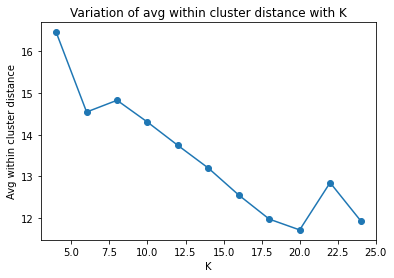

Avg within cluster distance:  [16.44804469273743, 14.541620111731843, 14.821787709497206, 14.300558659217877, 13.742737430167598, 13.200837988826816, 12.556145251396648, 11.981703910614526, 11.7231843575419, 12.853072625698324, 11.94608938547486]


In [90]:
k_vals = [x for x in range(4, 25, 2)]
dist = []
for i in range(len(k_vals)):
    dist.append(within_clus_dist2[i] / data2.shape[0])
plt.plot(k_vals, dist, marker='o')
plt.title('Variation of avg within cluster distance with K')
plt.xlabel('K')
plt.ylabel('Avg within cluster distance')
plt.show()
print('Avg within cluster distance: ', dist)

In [91]:
initial_medians20b = data2.sample(n=20, random_state=0)
kmedians_clus20b = kmedians(data2, initial_medians20b)
kmedians_clus20b.process()
clusters20b = kmedians_clus20b.get_clusters()
medians20b = kmedians_clus20b.get_medians()

In [92]:
import pickle
filename = 'clusters_k20b.pkl'
pickle.dump(clusters, open(filename, 'wb'))
# loaded_clus = pickle.load(open(filename, 'rb'))

**Amount of data in each cluster for general population dataset**

In [93]:
cluster_sizes2 = []
for cluster in clusters20b:
    cluster_sizes2.append(len(cluster))

In [112]:
print(cluster_sizes2)
print([x/data2.shape[0] for x in cluster_sizes2])

[39, 59, 62, 75, 90, 94, 108, 108, 125, 136, 169, 170, 185, 209, 232, 257, 267, 317, 418, 460]
[0.010893854748603353, 0.0164804469273743, 0.017318435754189943, 0.02094972067039106, 0.025139664804469275, 0.026256983240223464, 0.030167597765363128, 0.030167597765363128, 0.034916201117318434, 0.03798882681564246, 0.047206703910614524, 0.04748603351955307, 0.051675977653631286, 0.058379888268156425, 0.06480446927374302, 0.0717877094972067, 0.07458100558659218, 0.08854748603351956, 0.11675977653631285, 0.12849162011173185]


The cluster sizes for general population dataset are: 67, 72, 76, 82, 90, 114, 116, 133, 134, 139, 147, 184, 196, 200, 203, 231, 237, 320, 328, 511
The cluster sizes for more than 50k dataset are: 39, 59, 62, 75, 90, 94, 108, 108, 125, 136, 169, 170, 185, 209, 232, 257, 267, 317, 418, 460

Ratio of data in each cluster of general population dataset: 0.010893854748603353, 0.0164804469273743, 0.017318435754189943, 0.02094972067039106, 0.025139664804469275, 0.026256983240223464, 0.030167597765363128, 0.030167597765363128, 0.034916201117318434, 0.03798882681564246, 0.047206703910614524, 0.04748603351955307, 0.051675977653631286, 0.058379888268156425, 0.06480446927374302, 0.0717877094972067, 0.07458100558659218, 0.08854748603351956, 0.11675977653631285, 0.12849162011173185

Ratio of data in each cluster of more than 50k dataset: 0.018715083798882683, 0.02011173184357542, 0.021229050279329607, 0.022905027932960894, 0.025139664804469275, 0.031843575418994415, 0.03240223463687151, 0.03715083798882682, 0.037430167597765365, 0.0388268156424581, 0.04106145251396648, 0.05139664804469274, 0.054748603351955305, 0.055865921787709494, 0.05670391061452514, 0.06452513966480447, 0.06620111731843575, 0.0893854748603352, 0.09162011173184358, 0.14273743016759777

Thus, we can observe that the proportion of data in each cluster is comparable for the two datasets, indicating that they are related which we know they are.

**Finding the clusters that are overrepresented in the data**

In [121]:
# general population dataset
clus_arr = np.array(clusters20, dtype=object)
max_clus = np.argmax(clusters20)
print(max_clus)
# let us name this cluster as cluster A

3


In [122]:
# more than 50k dataset
clus_arr2 = np.array(clusters20b, dtype=object)
max_clus2 = np.argmax(clusters20b)
print(max_clus2)
# let us name this cluster as cluster B

6


The clusters overrepresented in general population is cluster 3 in the clusters formed for general population and for more than 50k population, it is cluster 6 in the clusters formed for that dataset.

Medians of these clusters:

In [129]:
# median of cluster A
medianA = medians20[3]
print(medianA)

[-1.0521532236654347, -0.5732033771072754, 0.17806375955626694, -0.6501492965236553, -0.8043886891099425, 0.10262676257992809, 0.5305290952063041, -0.35746396764362764, 0.5450476676329206, 0.03975988238231702, -0.17085783774185154, -0.060115461390938985, 0.33216578554612586, -0.18352749678150082, -0.10837484926972207, 0.337380097413775, -0.08222393780075526, -0.439518686920875, 0.04986178246329291, -0.27227017607991916, -0.6051838248330945, 0.06776527133061952, 0.3752927487878767, -0.07219133816796487, -0.08873785589757612, -0.11154634404808131, -0.04530304011465227, 0.05846400635139003, -0.3402003584892361, 0.010009157715418882, 0.32738554266871955, -0.10415235006122166, -0.03121659761920248, -0.22672673435489615, 0.2983400976634695]


In [130]:
# median of cluster B
medianB = medians20[6]
print(medianB)

[1.3264219758289195, -0.7836439716985524, -0.37817044609041306, 0.4286485483808151, 0.5887090610865757, -0.5931451207590989, -0.8343462684313527, -0.7897268633814345, 0.005639982470527179, -0.03312695225806369, 0.14457281241650902, -0.0021396038490807626, -0.38989775133624505, 0.9844946474127505, 0.8665554593727078, -0.19247323935830607, -0.13759172982557108, 0.08495236176025465, -0.10091123906813683, 0.14520193196522757, -0.11863940918852697, -0.023934566227817342, 0.2707033266767113, -0.17001291549399833, 0.01934825504609032, -0.10931436441244496, -0.16144737509277265, -0.14914999691375447, 0.04704094866343799, 0.047056633227347704, 0.16716457650609198, 0.12316494046702317, 0.18664960888067061, -0.2713300578752239, 0.11157159066260255]


**Most highly represented cluster in general population**

In [230]:
clusterA_data = data_1[0:0]
for val in clusters20[3]:
    clusterA_data = clusterA_data.append(data_1.iloc[val], ignore_index=True)

print(clusterA_data.info())
print(clusterA_data.describe())
clusterA_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AAGE      76 non-null     int64 
 1   ACLSWKR   76 non-null     object
 2   ADTIND    76 non-null     int64 
 3   ADTOCC    76 non-null     int64 
 4   AHGA      76 non-null     object
 5   AMARITL   76 non-null     object
 6   AMJIND    76 non-null     object
 7   AMJOCC    76 non-null     object
 8   ARACE     76 non-null     object
 9   ASEX      76 non-null     object
 10  AWKSTAT   76 non-null     object
 11  FILESTAT  76 non-null     object
 12  HHDFMX    76 non-null     object
 13  HHDREL    76 non-null     object
 14  MIGSAME   76 non-null     object
 15  NOEMP     76 non-null     int64 
 16  PARENT    76 non-null     object
 17  VETYN     76 non-null     int64 
 18  WKSWORK   76 non-null     int64 
 19  YEAR      76 non-null     int64 
dtypes: int64(7), object(13)
memory usage: 12.0+ KB
None
    

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AMARITL,AMJIND,AMJOCC,ARACE,ASEX,AWKSTAT,FILESTAT,HHDFMX,HHDREL,MIGSAME,NOEMP,PARENT,VETYN,WKSWORK,YEAR
0,20,Not in universe,0,0,Some college but no degree,Never married,Not in universe or children,Not in universe,White,Male,Not in labor force,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,0,Not in universe,2,0,95
1,4,Not in universe,0,0,Children,Never married,Not in universe or children,Not in universe,White,Female,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Not in universe under 1 year old,0,Mother only present,0,0,95
2,18,Not in universe,0,0,7th and 8th grade,Never married,Not in universe or children,Not in universe,White,Male,Not in labor force,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,0,Not in universe,2,0,95
3,7,Not in universe,0,0,Children,Never married,Not in universe or children,Not in universe,White,Male,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Yes,0,Both parents present,0,0,94
4,28,Self-employed-not incorporated,37,12,Masters degree(MA MS MEng MEd MSW MBA),Married-civilian spouse present,Business and repair services,Professional specialty,White,Female,Children or Armed Forces,Joint both under 65,Spouse of householder,Spouse of householder,No,4,Not in universe,2,44,94


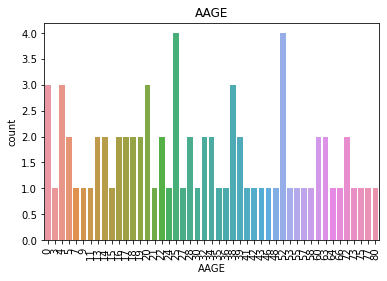

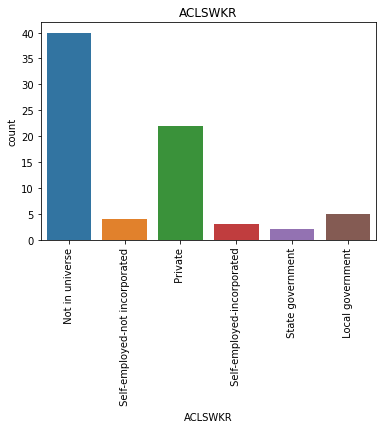

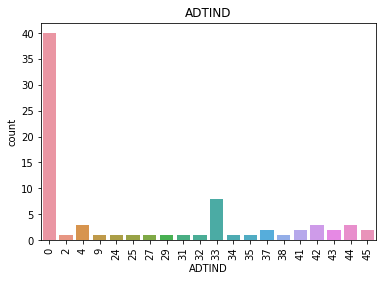

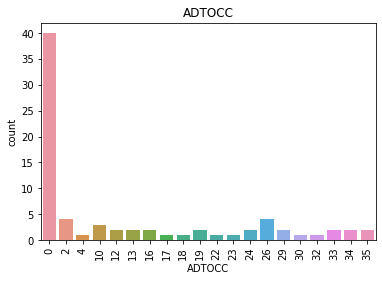

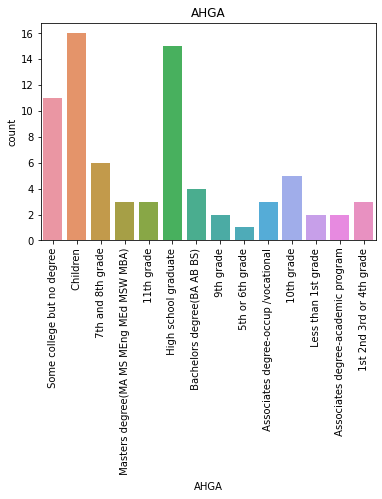

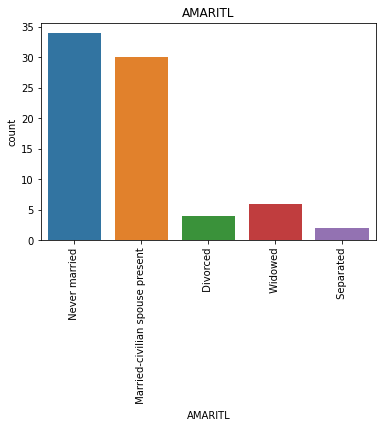

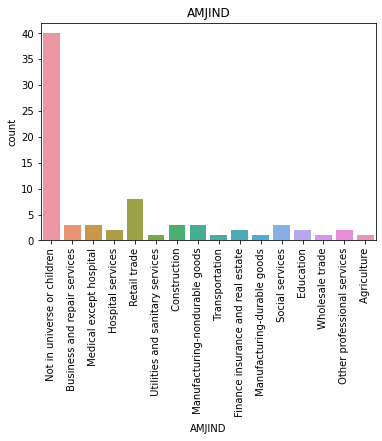

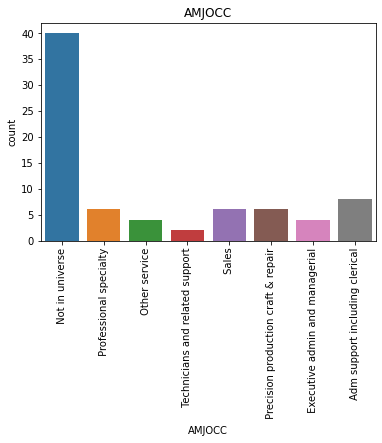

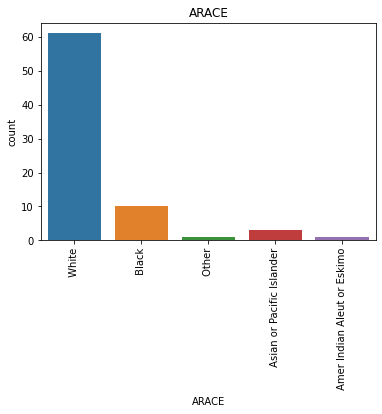

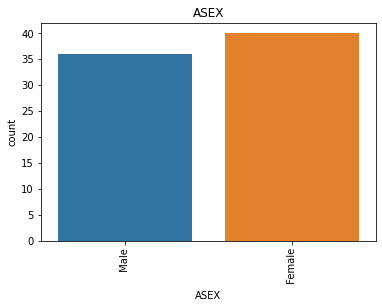

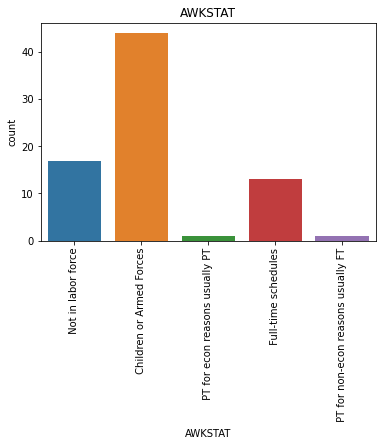

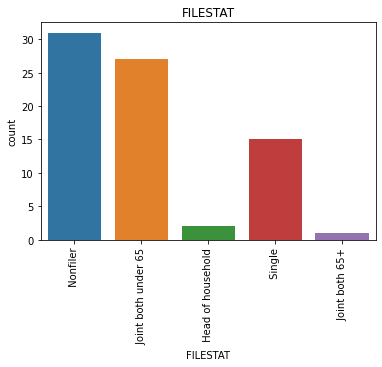

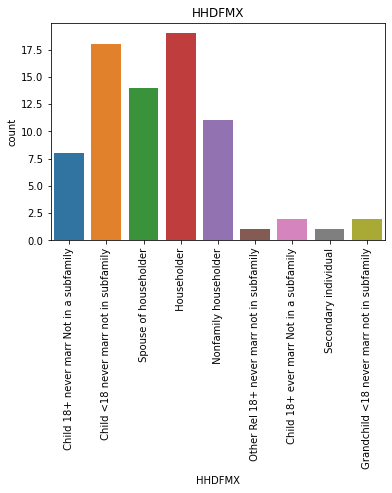

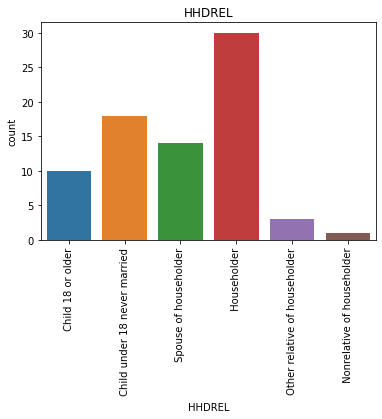

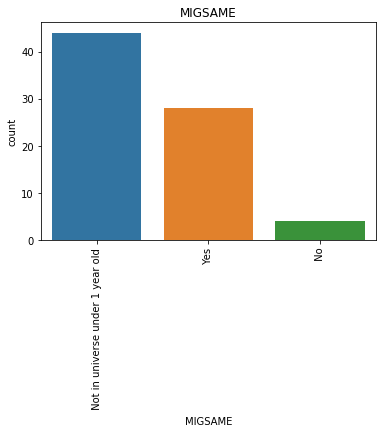

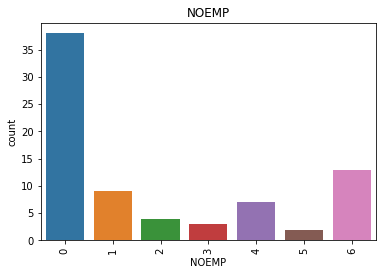

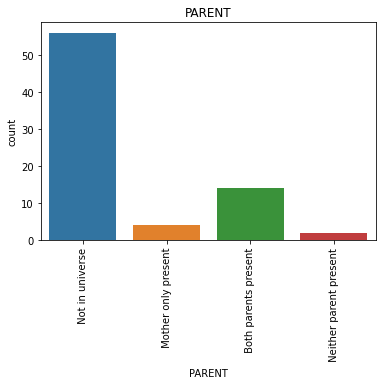

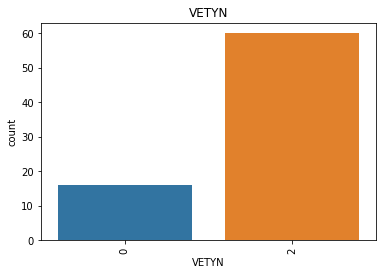

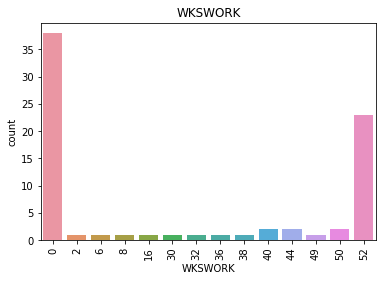

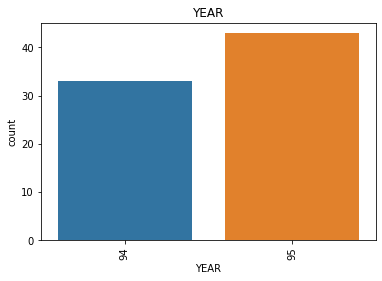

In [231]:
columns = clusterA_data.columns
for column in columns:
    plt.title(column)
    sns.countplot(x = clusterA_data[column])
    plt.xticks(rotation=90)
    plt.show()

**Most highly represented cluster in more than 50k population**

In [235]:
clusterB_data = data2_1[0:0]
for val in clusters20b[6]:
    clusterB_data = clusterB_data.append(data2_1.iloc[val], ignore_index=True)

print(clusterB_data.info())
print(clusterB_data.describe())
clusterB_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AAGE      185 non-null    int64 
 1   ACLSWKR   185 non-null    object
 2   ADTIND    185 non-null    int64 
 3   ADTOCC    185 non-null    int64 
 4   AHGA      185 non-null    object
 5   AMARITL   185 non-null    object
 6   AMJIND    185 non-null    object
 7   AMJOCC    185 non-null    object
 8   ARACE     185 non-null    object
 9   ASEX      185 non-null    object
 10  AWKSTAT   185 non-null    object
 11  FILESTAT  185 non-null    object
 12  HHDFMX    185 non-null    object
 13  HHDREL    185 non-null    object
 14  MIGSAME   185 non-null    object
 15  NOEMP     185 non-null    int64 
 16  PARENT    185 non-null    object
 17  VETYN     185 non-null    int64 
 18  WKSWORK   185 non-null    int64 
 19  YEAR      185 non-null    int64 
dtypes: int64(7), object(13)
memory usage: 29.0+ KB
None
  

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AMARITL,AMJIND,AMJOCC,ARACE,ASEX,AWKSTAT,FILESTAT,HHDFMX,HHDREL,MIGSAME,NOEMP,PARENT,VETYN,WKSWORK,YEAR
0,29,Federal government,49,3,Associates degree-academic program,Married-civilian spouse present,Public administration,Executive admin and managerial,Black,Female,Children or Armed Forces,Joint both under 65,Spouse of householder,Spouse of householder,Yes,6,Not in universe,2,52,94
1,27,Private,21,2,Bachelors degree(BA AB BS),Married-civilian spouse present,Manufacturing-nondurable goods,Executive admin and managerial,White,Female,Children or Armed Forces,Joint both under 65,Spouse of householder,Spouse of householder,No,6,Not in universe,2,52,94
2,30,Private,37,2,Bachelors degree(BA AB BS),Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,Male,Children or Armed Forces,Joint both under 65,Spouse of householder,Spouse of householder,Yes,6,Not in universe,2,52,94
3,30,Private,34,3,Masters degree(MA MS MEng MEd MSW MBA),Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,Female,Children or Armed Forces,Joint both under 65,Spouse of householder,Spouse of householder,Yes,4,Not in universe,2,52,94
4,24,Private,34,26,High school graduate,Married-civilian spouse present,Finance insurance and real estate,Adm support including clerical,White,Female,Children or Armed Forces,Joint both under 65,Spouse of householder,Spouse of householder,Yes,2,Not in universe,2,52,94


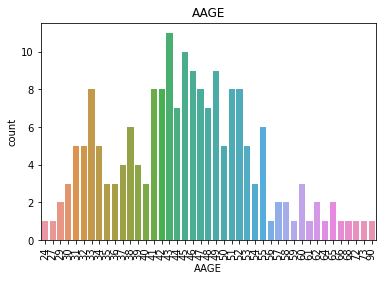

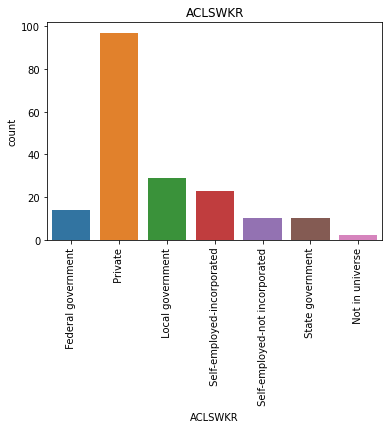

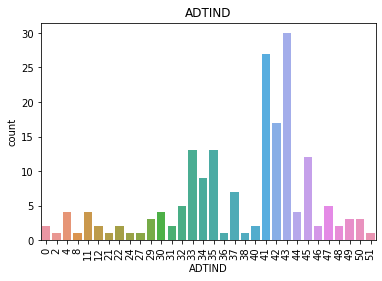

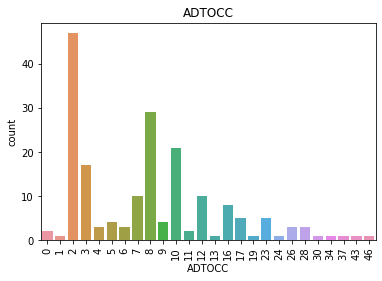

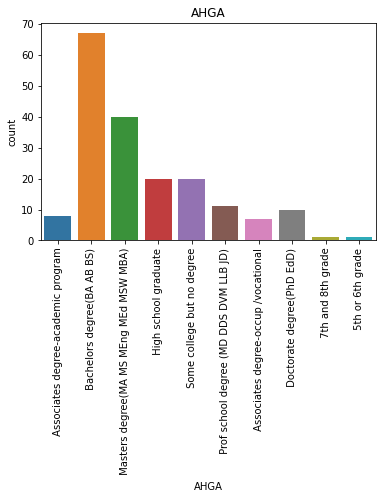

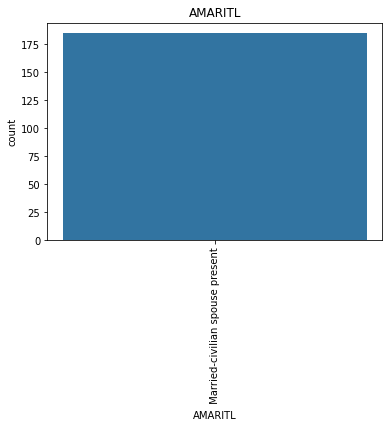

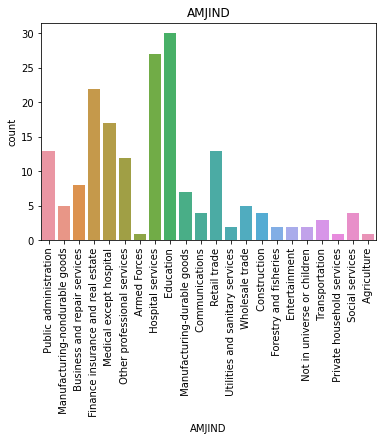

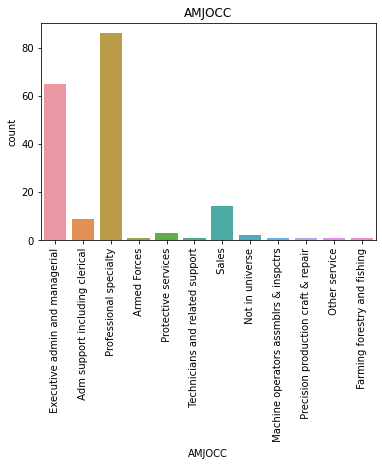

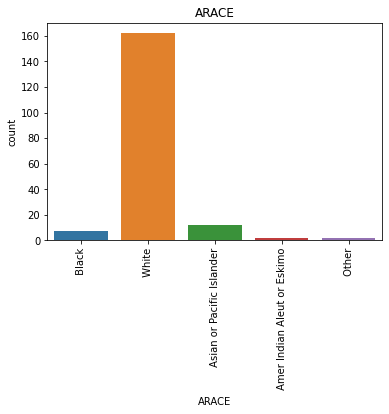

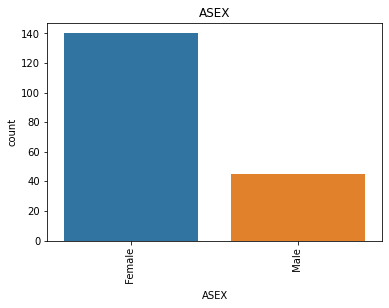

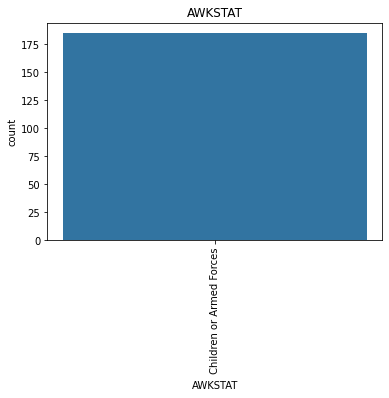

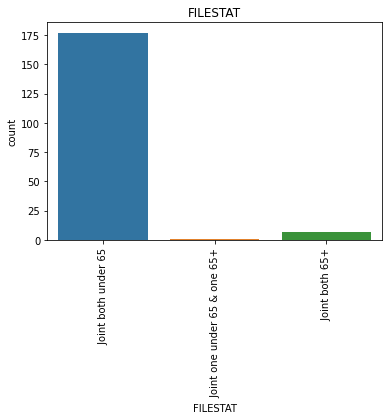

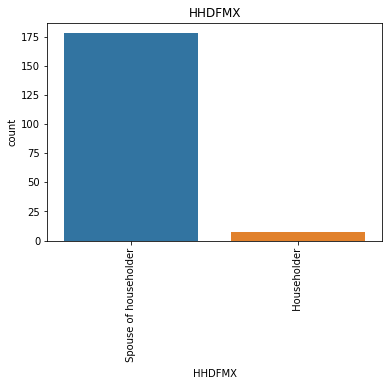

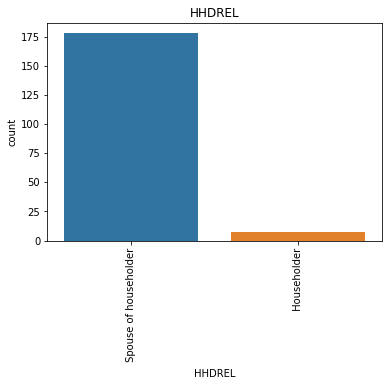

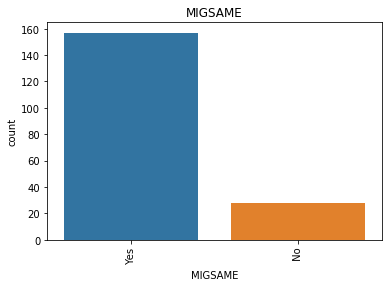

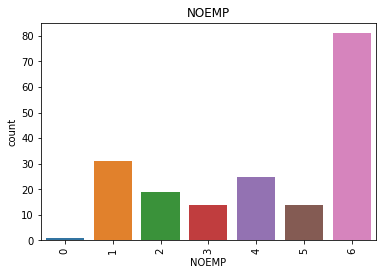

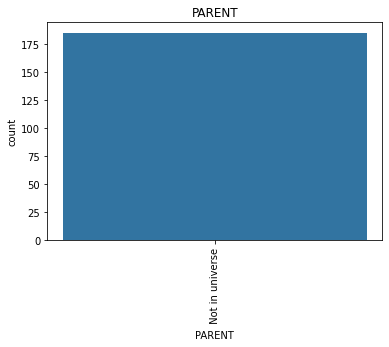

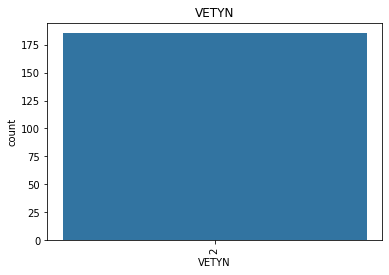

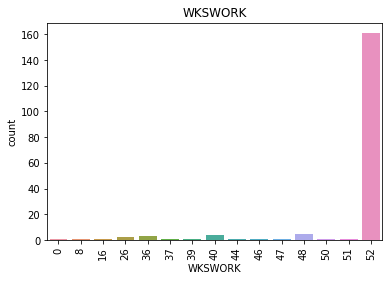

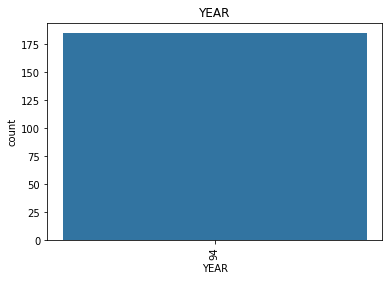

In [236]:
columns = clusterB_data.columns
for column in columns:
    plt.title(column)
    sns.countplot(x = clusterB_data[column])
    plt.xticks(rotation=90)
    plt.show()

The people in the most highly represented cluster of the general population have the following characteristics: This data is most highly represented by children and high school graduates. Most are unmarried. Majority of people have not in universe as the various occupation codes indicating that the overrepresented population in this data does not work. The most highly represented race is of whites. Similar numbers of males and females with slightly greater number of females.

The people in the most highly represented cluster of the more than 50k earnings have the following characteristics: This data is most highly represented by married, civilians. Majority of workers are in the private sector in the Education and Hospital services industries, and the most represented level of education is that of bachelor's degree. Major occupation code is that of professional specialty. The most highly represented race is of whites. There is a higher proportion of females in this data. 
These observations can be correleted with more than 50k earnings dataset having the type of people who are earning more.